In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from utils import columns

In [2]:
df = pd.read_csv('../data/united_data.csv', index_col=0)

## First let's try some models excluding rows containing nan values

In [103]:
X = df.dropna().drop('Corn_Yield', axis=1)
y = df.dropna()['Corn_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Linear regression is too simple, performs poorly on the data

In [106]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-1.0723973598188687e+19

In [107]:
mean_squared_error(y_test, reg.predict(X_test))

2.2467430701732484e+22

#### Multilayer Perceptron seems to perform better, we do a cross-validation and get a mean score of 0.85, with a mean-squared error of 496

In [108]:
reg = MLPRegressor(max_iter=500).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8953622431513062

In [109]:
mean_squared_error(y_test, reg.predict(X_test))

219.22298943181306

In [110]:
cross_val_score(reg, X, y, cv=5).mean()

0.8711425479354766

## Lets try a models that can work with nan values

In [119]:
y = df['Corn_Yield']
X = df.drop(columns=['Corn_Yield'], axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [121]:
from lightgbm import LGBMRegressor

In [122]:
reg = LGBMRegressor().fit(X_train, y_train)

In [123]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

248.96941368640677

In [124]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9676302671836321

In [125]:
fi = reg.feature_importances_
columns[np.argwhere(fi > 10)]

array([['01-10-min'],
       ['01-13-min'],
       ['03-16-min'],
       ['03-19-min'],
       ['04-06-min'],
       ['05-06-min'],
       ['05-10-min'],
       ['05-16-max'],
       ['05-17-min'],
       ['06-02-min'],
       ['06-04-min'],
       ['06-05-max'],
       ['06-11-min'],
       ['06-14-min'],
       ['06-15-min'],
       ['06-15-max'],
       ['06-20-min'],
       ['06-22-max'],
       ['06-27-min'],
       ['06-30-avg'],
       ['07-08-min'],
       ['07-09-max'],
       ['07-10-min'],
       ['07-11-max'],
       ['07-26-min'],
       ['07-26-max'],
       ['07-29-max'],
       ['08-05-avg'],
       ['08-05-min'],
       ['08-10-min'],
       ['08-17-min'],
       ['09-15-min'],
       ['09-16-min'],
       ['09-23-avg']], dtype='<U10')

In [126]:
cross_val_score(reg, X, y, cv=5).mean()

0.902939341911934

In [127]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([120.5260115 ,  98.61891918, 120.60248054, 130.35751753,
       136.78911036, 118.9361118 , 130.005782  ,  98.0061267 ,
       103.02727055, 162.54478996, 115.75791891, 107.4911311 ,
       129.22868225, 118.02163551, 138.47732441, 138.2820198 ,
       121.732636  ])

In [84]:
res.mean()

124.73717822252678

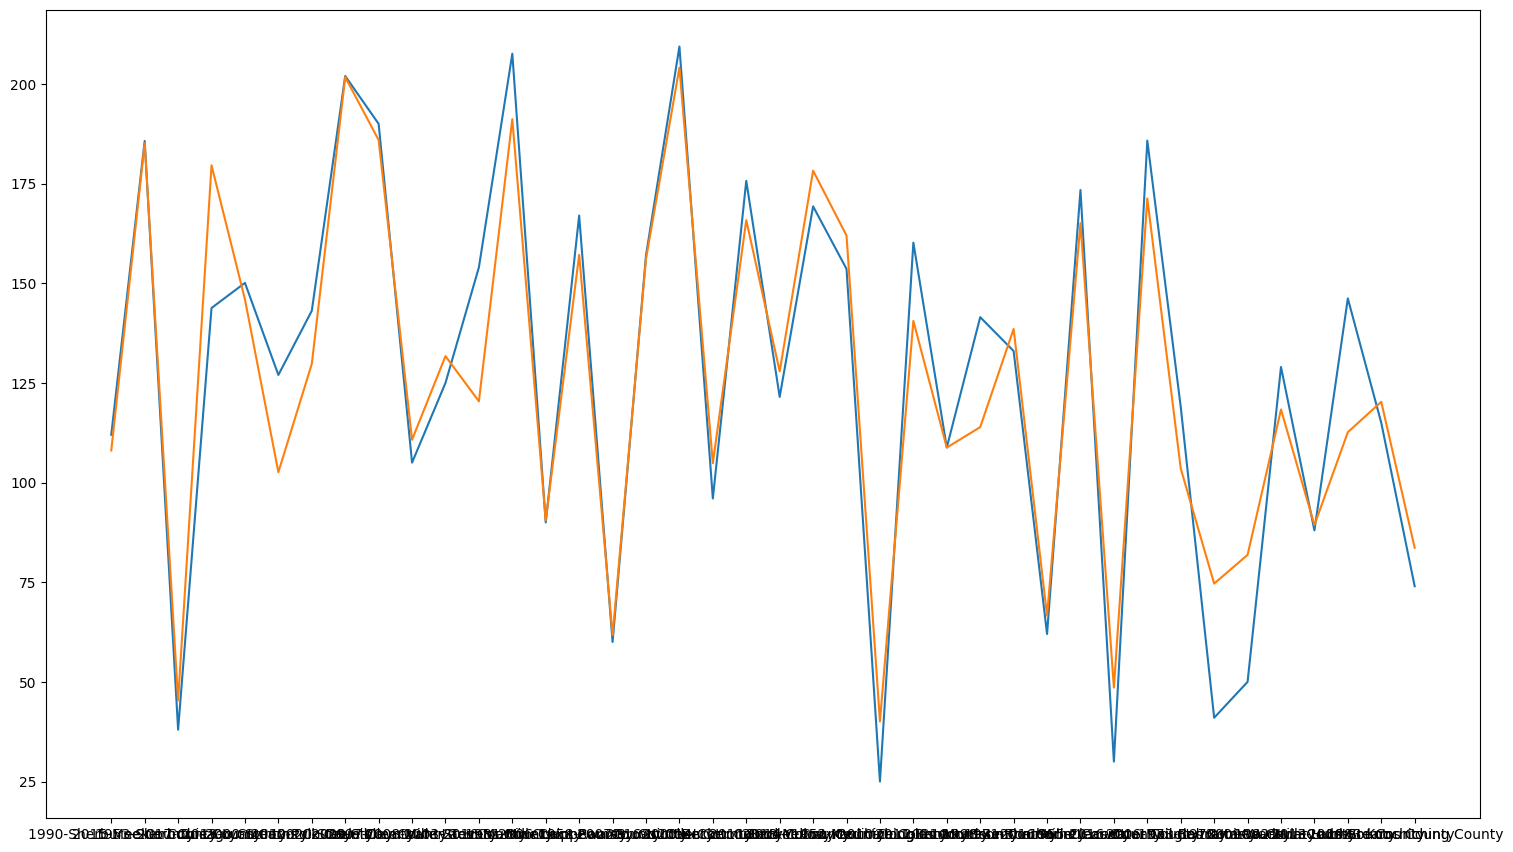

In [128]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [129]:
X = df.fillna(0).drop('Corn_Yield', axis=1)
y = df.fillna(0)['Corn_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Linear regression is too simple, performs poorly on the data

In [130]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-5.408037788202905e+19

In [131]:
mean_squared_error(y_test, reg.predict(X_test))

1.3038398691674469e+23

In [132]:
X = df.fillna(0).drop('Corn_Yield', axis=1)
y = df.fillna(0)['Corn_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [133]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-3.276270881886452e+20

In [134]:
mean_squared_error(y_test, reg.predict(X_test))

7.595221168724562e+23

#### Multilayer Perceptron seems to perform better, we do a cross-validation and get a mean score of 0.85, with a mean-squared error of 496

In [135]:
reg = MLPRegressor(max_iter=500).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8730457556968911

In [136]:
mean_squared_error(y_test, reg.predict(X_test))

294.31191697897606

In [137]:
cross_val_score(reg, X, y, cv=5).mean()

0.8774455561356831

## Lets try a models that can work with nan values

In [3]:
y = df['Corn_Yield']
X = df.drop(columns=['Corn_Yield'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [140]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [141]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

255.14635061853272

In [142]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9669859493651215

In [143]:
cross_val_score(reg, X, y, cv=5).mean()

0.900096424272237

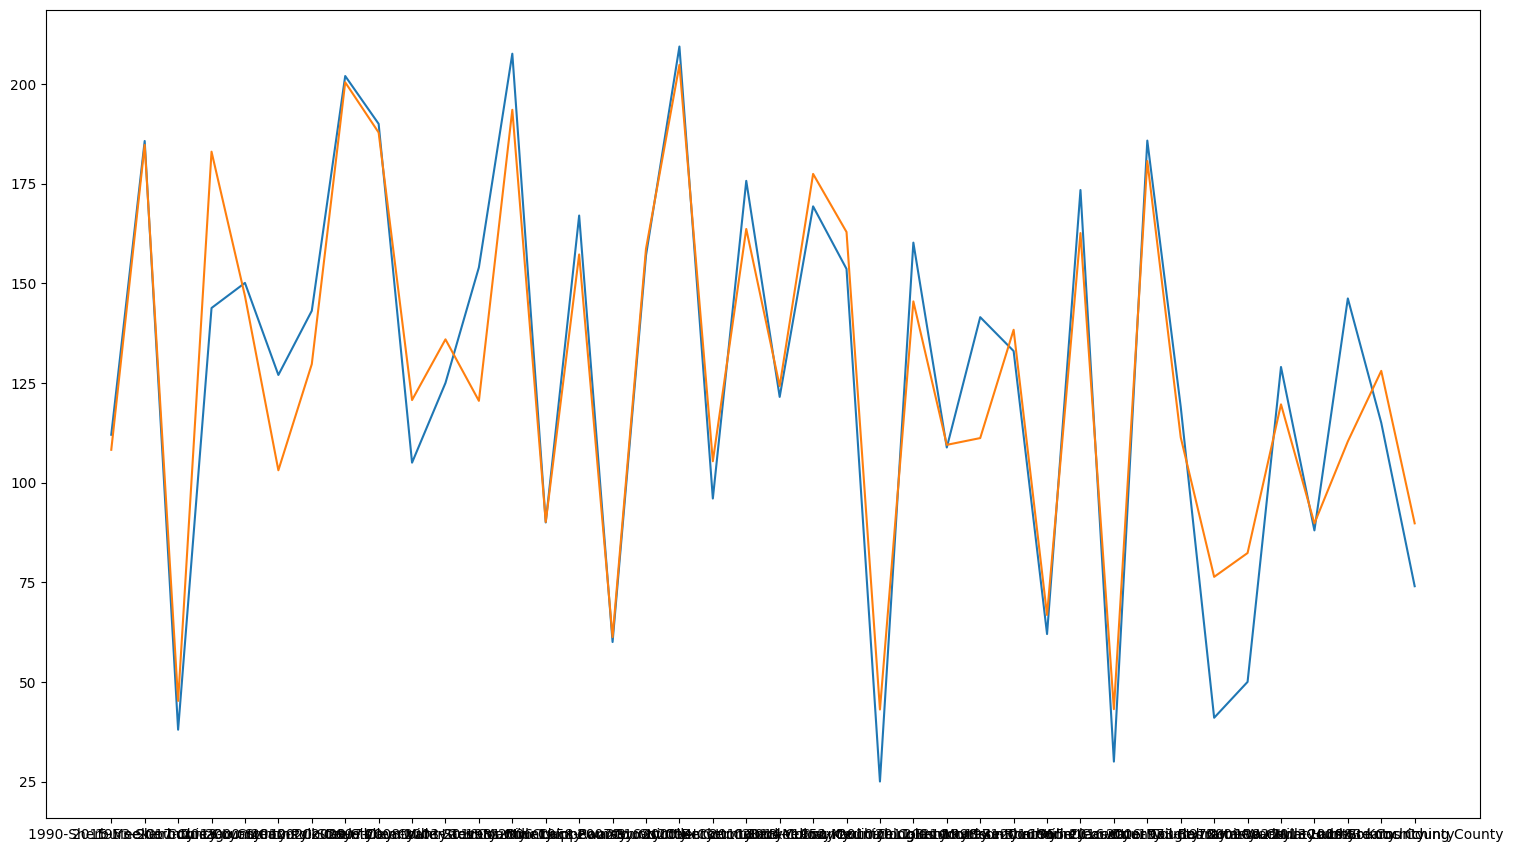

In [144]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [5]:
from lightgbm import LGBMRegressor, plot_importance

In [6]:
reg = LGBMRegressor().fit(X_train, y_train)

In [7]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

248.96941368640677

In [8]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9676302671836321

In [10]:
fi = reg.feature_importances_
columns[np.argwhere(fi > 10)]

array([['01-10-min'],
       ['01-13-min'],
       ['03-16-min'],
       ['03-19-min'],
       ['04-06-min'],
       ['05-06-min'],
       ['05-10-min'],
       ['05-16-max'],
       ['05-17-min'],
       ['06-02-min'],
       ['06-04-min'],
       ['06-05-max'],
       ['06-11-min'],
       ['06-14-min'],
       ['06-15-min'],
       ['06-15-max'],
       ['06-20-min'],
       ['06-22-max'],
       ['06-27-min'],
       ['06-30-avg'],
       ['07-08-min'],
       ['07-09-max'],
       ['07-10-min'],
       ['07-11-max'],
       ['07-26-min'],
       ['07-26-max'],
       ['07-29-max'],
       ['08-05-avg'],
       ['08-05-min'],
       ['08-10-min'],
       ['08-17-min'],
       ['09-15-min'],
       ['09-16-min'],
       ['09-23-avg']], dtype='<U10')

In [150]:
cross_val_score(reg, X, y, cv=5).mean()

0.902939341911934

In [9]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([120.5260115 ,  98.61891918, 120.60248054, 130.35751753,
       136.78911036, 118.9361118 , 130.005782  ,  98.0061267 ,
       103.02727055, 162.54478996, 115.75791891, 107.4911311 ,
       129.22868225, 118.02163551, 138.47732441, 138.2820198 ,
       121.732636  ])

In [12]:
res.mean()

122.84738047619233

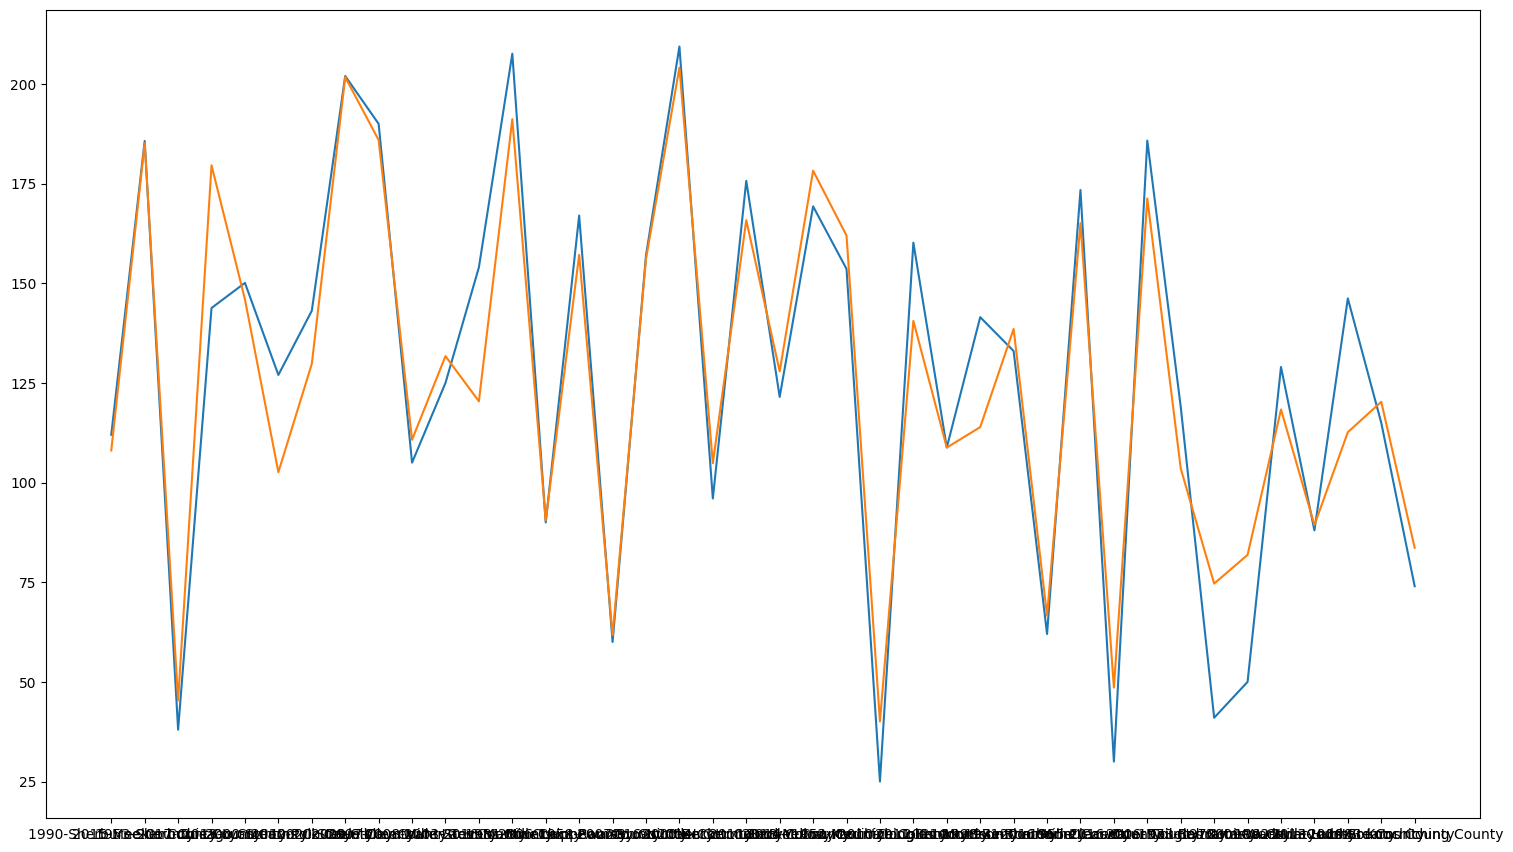

In [153]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [10]:
get_data_pred('ACAvNTuEuFWcmwms', model=reg.predict, adjust=True, sklearn=True)

array([209.99934685, 206.49524641, 239.78496726, 230.28955452,
       256.21248174, 212.52934651, 247.8713862 , 217.55767782,
       215.75683512, 262.43541787, 252.50908788, 232.36741375,
       260.26462708, 262.6085905 , 284.80369392, 277.41928154,
       239.077764  ])

In [26]:
from os import listdir
from os.path import isfile, join
mypath = "../data/weather/prediction_targets_daily/"
filenames = [f[:16] for f in listdir(mypath) if isfile(join(mypath, f))]

In [27]:
import tqdm
preds = []
for filename in tqdm.tqdm(filenames):
    pred = get_data_pred(filename, model=reg.predict, adjust=True, sklearn=True)
    preds.append(pred)

100%|████████████████████████████████████████████████████████████████████████████████| 198/198 [05:05<00:00,  1.54s/it]


In [28]:
preds

[array([209.99934685, 206.49524641, 239.78496726, 230.28955452,
        256.21248174, 212.52934651, 247.8713862 , 217.55767782,
        215.75683512, 262.43541787, 252.50908788, 232.36741375,
        260.26462708, 262.6085905 , 284.80369392, 277.41928154,
        239.077764  ]),
 array([157.26826814, 141.05196532, 151.84890112, 162.29668667,
        163.2496641 , 158.38368426, 179.90146059, 140.07541599,
        145.40974065, 171.07888556, 142.38276632, 181.53514616,
        184.20950301, 197.22675893, 204.24527375, 181.08315773,
        188.40152305, 197.32122545, 196.96465211, 196.93220782,
        182.7706352 , 190.72707734, 198.08835251, 185.52960616,
        202.56807017, 250.58861173, 211.99121418, 206.7447273 ,
        200.4528633 , 244.94514782, 236.22546848, 242.09938984,
        254.90003754, 238.059098  , 231.05924329, 266.73194548,
        261.5066586 , 286.7129249 , 255.22139664, 265.08240294,
        257.74620886, 240.77808606, 302.63711723, 306.12886421,
        275.2790